In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('regression.csv')
data=data.iloc[:,1:]


/Users/rebeccameow/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/rebeccameow/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


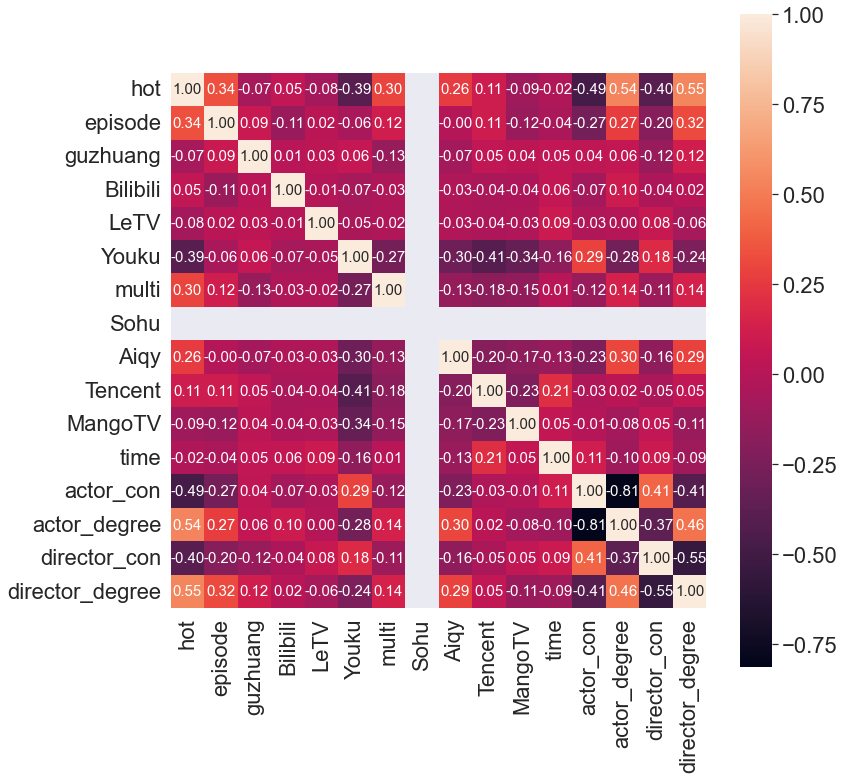

In [4]:
plt.figure(figsize=(12,12))
cm = np.corrcoef(data.values.T)   #corrcoef方法按行计算皮尔逊相关系数,cm是对称矩阵
#使用np.corrcoef(a)可计算行与行之间的相关系数,np.corrcoef(a,rowvar=0)用于计算各列之间的相关系数,输出为相关系数矩阵。
sns.set(font_scale=2)   #font_scale设置字体大小
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=data.columns,xticklabels=data.columns)
plt.show()


/Users/rebeccameow/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 22.335, test: 173.343
R^2 train: 0.931, test: 0.518


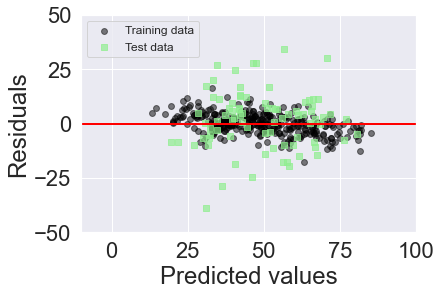

<Figure size 3600x3600 with 0 Axes>

In [5]:
#划分数据训练随机森林回归模型
X = data.iloc[:,1:].values   #特征列
y = data['hot'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1,max_depth=10)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
#模型效果评估
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

'''
MSE train: 22.335, test: 173.343
R^2 train: 0.931, test: 0.518
'''
#绘制误差图
plt.scatter(y_train_pred, y_train_pred - y_train, c='black', marker='o', s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left', prop={'size': 12})
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([-10, 100])
plt.ylim([-50, 50])
plt.figure(figsize=(50,50))
#plt.tight_layout()
plt.show()


,episode,guzhuang,Bilibili,LeTV,Youku,multi,Sohu,Aiqy,Tencent,MangoTV,time,actor_con
0,12.0,0,0,0,0,0,0,0,0,1,0,0.333333
1,30.0,0,0,0,0,0,0,1,0,0,0,0.250000
2,24.0,0,0,0,0,0,0,0,1,0,0,0.200000
3,14.0,0,0,0,0,1,0,0,0,0,0,0.200000
4,36.0,0,0,0,0,0,0,1,0,0,0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
408,30.0,0,0,0,0,0,0,0,1,0,24,0.200000
409,26.0,0,0,0,1,0,0,0,0,0,24,0.333333
410,24.0,0,0,0,0,0,0,1,0,0,24,0.333333
411,24.0,1,0,0,0,0,0,0,1,0,24,0.111111


In [72]:
#划分数据训练随机森林回归模型
X = data.iloc[:,1:-4].values   #不加入网络特性
y = data['hot'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1,max_depth=10)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
#模型效果评估
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
'''
加入网络特性
MSE train: 17.686, test: 126.464
R^2 train: 0.946, test: 0.648
未加入网络特性
MSE train: 47.039, test: 249.301
R^2 train: 0.855, test: 0.307
'''

/Users/rebeccameow/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 17.686, test: 126.464
R^2 train: 0.946, test: 0.648


'\nMSE train: 47.039, test: 249.301\nR^2 train: 0.855, test: 0.307\n\n\n'

/Users/rebeccameow/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.13801452784503632


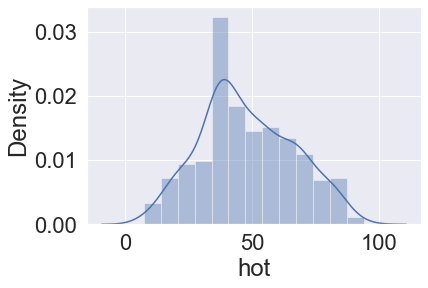

In [77]:
sns.distplot(data['hot'])
print(len(data[data['hot']>=70])/len(data))#0.138

In [69]:
def hotshow(x):
    if x>=70:
        return 1
    else:
        return 0
data['hotshow']=data['hot'].apply(hotshow)

In [70]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler# 随机欠采样函数
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 分别获取特征值和标签值
X = data.iloc[:,1:-5].values #-1加入网络特性；-5不加入网络特性
y = data['hotshow'].values
model_RandomUnderSample=RandomUnderSampler()
X_undersampled, y_undersampled=model_RandomUnderSample.fit_sample(X,y)

print(Counter(y_undersampled))
print(X_undersampled.shape)#57个1与0，解决样本不平衡问题
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#随机森林分类
model_rf = RandomForestClassifier(n_estimators=500, random_state=1,min_samples_split=0.03,max_depth=10)
model_rf.fit(X_train, y_train)
print("train:",accuracy_score(y_train, model_rf.predict(X_train)))
y_pred = model_rf.predict(X_test)
print("test:",accuracy_score(y_test, y_pred))
'''
加入网络特性
train: 0.9393939393939394
test: 0.8554216867469879
未加入网络特性
train: 0.9363636363636364
test: 0.8192771084337349
'''

Counter({0: 57, 1: 57})
(114, 11)
train: 0.9363636363636364
test: 0.8192771084337349


'\n加入网络特性\ntrain: 0.9393939393939394\ntest: 0.8554216867469879\n\n未加入网络特性\ntrain: 0.9363636363636364\ntest: 0.8192771084337349\n'